In [1]:
import sqlite3
import pandas as pd

# 1. Read the CSV file  
csv_file_path = "Obesity prediction.csv"
df = pd.read_csv(csv_file_path)

# 2. Connect to the SQLite database  
db_name = "weights.db"
conn = sqlite3.connect(db_name)

# 3. Write the DataFrame to the SQLite database  
table_name = "weights"
df.to_sql(table_name, conn, if_exists="replace", index=False)

# 4. Query the database and check  
query = f"SELECT * FROM {table_name} LIMIT 5"
result = pd.read_sql_query(query, conn)
print(result)

   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overwe

In [2]:
try:
    # Retrieve data from the database  
    df = pd.read_sql_query("SELECT * FROM weights", conn)

    # Check for duplicates  
    duplicates = df[df.duplicated()]
    print("Duplicate Kayıtlar:")
    print(duplicates)

    # Check for missing values  
    missing_data = df.isnull().sum()
    print("Eksik Değer Sayısı:")
    print(missing_data)

finally:
    print("tamamlandı")
    

Duplicate Kayıtlar:
     Gender   Age  Height  Weight family_history FAVC  FCVC  NCP        CAEC  \
98   Female  21.0    1.52    42.0             no   no   3.0  1.0  Frequently   
106  Female  25.0    1.57    55.0             no  yes   2.0  1.0   Sometimes   
174    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
179    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
184    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
209  Female  22.0    1.69    65.0            yes  yes   2.0  3.0   Sometimes   
309  Female  16.0    1.66    58.0             no   no   2.0  1.0   Sometimes   
460  Female  18.0    1.62    55.0            yes  yes   2.0  3.0  Frequently   
467    Male  22.0    1.74    75.0            yes  yes   3.0  3.0  Frequently   
496    Male  18.0    1.72    53.0            yes  yes   2.0  3.0   Sometimes   
527  Female  21.0    1.52    42.0             no  yes   3.0  1.0  Frequently   
659  Female  21.0   

In [3]:
# Show unique values of categorical features  
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column} Number of unique values {df[column].nunique()}")
    print(df[column].unique())
    print("\n")

Gender Number of unique values 2
['Female' 'Male']


family_history Number of unique values 2
['yes' 'no']


FAVC Number of unique values 2
['no' 'yes']


CAEC Number of unique values 4
['Sometimes' 'Frequently' 'Always' 'no']


SMOKE Number of unique values 2
['no' 'yes']


SCC Number of unique values 2
['no' 'yes']


CALC Number of unique values 4
['no' 'Sometimes' 'Frequently' 'Always']


MTRANS Number of unique values 5
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


Obesity Number of unique values 7
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']




In [4]:
# Find the number of duplicate rows  
duplicate_count = df.duplicated().sum()
print(f"Total number of duplicate records: {duplicate_count}")

Total number of duplicate records: 24


In [5]:
# Show the total number of missing values per column  
missing_data = df.isnull().sum()

print("Number of Missing Values:")
print(missing_data)

# Quick check to see if there are any missing values  
if missing_data.sum() > 0:
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

Number of Missing Values:
Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64
There are no missing values in the dataset.


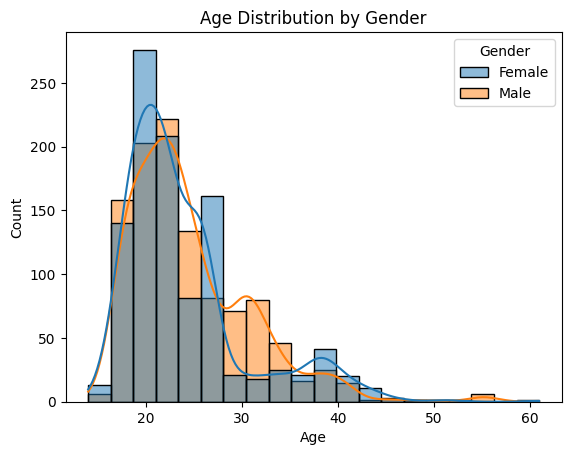

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
df.groupby('Gender')['Age'].describe()
sns.histplot(data=df, x='Age', hue='Gender', kde=True, bins=20)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [7]:
df.groupby('Gender')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1043.0,24.001907,6.407832,15.0,19.627721,22.0,26.000000,61.0
Male,1068.0,24.616020,6.273121,14.0,20.000000,23.0,27.933529,56.0


Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


C:\Users\serca\AppData\Local\Temp\ipykernel_5720\1404924594.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Obesity', order=obesity_distribution.index, palette='Set2')


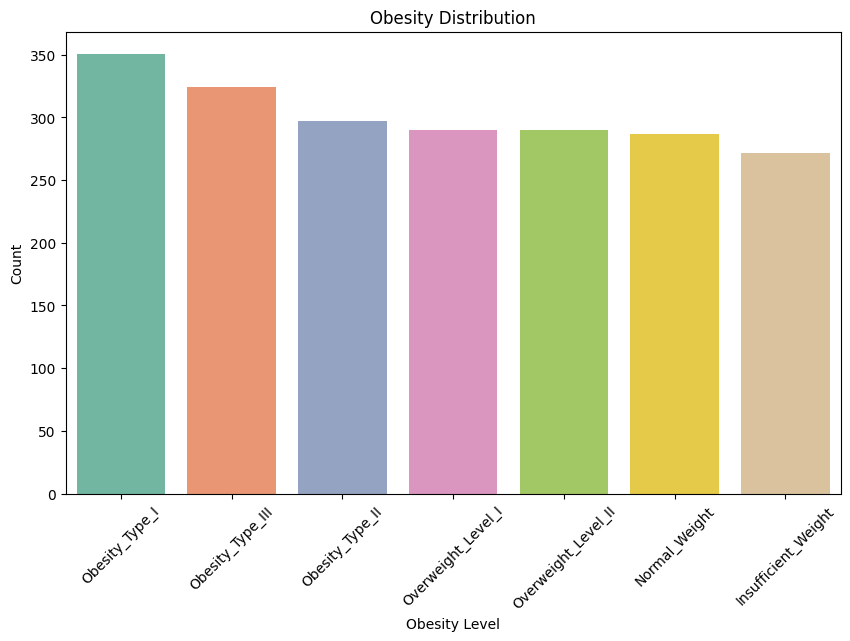

In [8]:
# View the distribution of the target variable  
obesity_distribution = df['Obesity'].value_counts()
print(obesity_distribution)

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize with a bar plot  
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Obesity', order=obesity_distribution.index, palette='Set2')
plt.title('Obesity Distribution')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig("C:/Users/serca/Desktop/obesity-distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Calculate BMI and add it to the dataset  
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

print(df[['Weight', 'Height', 'BMI']].head())

   Weight  Height        BMI
0    64.0    1.62  24.386526
1    56.0    1.52  24.238227
2    77.0    1.80  23.765432
3    87.0    1.80  26.851852
4    89.8    1.78  28.342381


In [10]:
# Drop Height and Weight columns  
df = df.drop(['Height', 'Weight'], axis=1)
df

,Gender,Age,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,BMI
0,Female,21.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [11]:
#import pandas as pd

# Categorical columns  
#categorical_columns = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Perform One-Hot Encoding  
#df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

categorical_columns = ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Separate the 'Obesity' column  
X = df.drop('Obesity', axis=1)
y = df['Obesity']

# Set up OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot_encoder, categorical_columns)
    ],
    remainder='passthrough'  # Diğer sütunları olduğu gibi bırak
)

# Perform the transformation  
X_encoded_array = preprocessor.fit_transform(X)

# Create new column names (OneHotEncoder columns)  
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Remaining columns (numeric etc.)  
other_columns = [col for col in X.columns if col not in categorical_columns]

# Final column names  
final_columns = list(onehot_feature_names) + other_columns

# Create the new DataFrame  
df_encoded = pd.DataFrame(X_encoded_array, columns=final_columns)

# Label Encoding for 'Obesity'  
label_encoder = LabelEncoder()
df_encoded['Obesity'] = label_encoder.fit_transform(y)

# Check the result  
print(df_encoded.head())
print(df_encoded['Obesity'].head())
df_encoded


   Gender_Male  family_history_yes  FAVC_yes  CAEC_Frequently  CAEC_Sometimes  \
0          0.0                 1.0       0.0              0.0             1.0   
1          0.0                 1.0       0.0              0.0             1.0   
2          1.0                 1.0       0.0              0.0             1.0   
3          1.0                 0.0       0.0              0.0             1.0   
4          1.0                 0.0       0.0              0.0             1.0   

   CAEC_no  SMOKE_yes  SCC_yes  CALC_Frequently  CALC_Sometimes  ...  \
0      0.0        0.0      0.0              0.0             0.0  ...   
1      0.0        1.0      1.0              0.0             1.0  ...   
2      0.0        0.0      0.0              1.0             0.0  ...   
3      0.0        0.0      0.0              1.0             0.0  ...   
4      0.0        0.0      0.0              0.0             1.0  ...   

   MTRANS_Public_Transportation  MTRANS_Walking   Age  FCVC  NCP  CH2O  FAF  \
0

,Gender_Male,family_history_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,Obesity
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,21.000000,2.0,3.0,2.000000,0.000000,1.000000,24.386526,1
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,21.000000,3.0,3.0,3.000000,3.000000,0.000000,24.238227,1
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,23.000000,2.0,3.0,2.000000,2.000000,1.000000,23.765432,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,27.000000,3.0,3.0,2.000000,2.000000,0.000000,26.851852,5
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,22.000000,2.0,1.0,2.000000,0.000000,0.000000,28.342381,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,20.976842,3.0,3.0,1.728139,1.676269,0.906247,44.901475,4
2107,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,21.982942,3.0,3.0,2.005130,1.341390,0.599270,43.741923,4
2108,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,22.524036,3.0,3.0,2.054193,1.414209,0.646288,43.543817,4
2109,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,24.361936,3.0,3.0,2.852339,1.139107,0.586035,44.071535,4


In [13]:
#from sklearn.preprocessing import LabelEncoder

# Encode the 'Obesity' column with Label Encoding  
#label_encoder = LabelEncoder()
#df_encoded['Obesity'] = label_encoder.fit_transform(df_encoded['Obesity'])

#print(df_encoded['Obesity'].head())

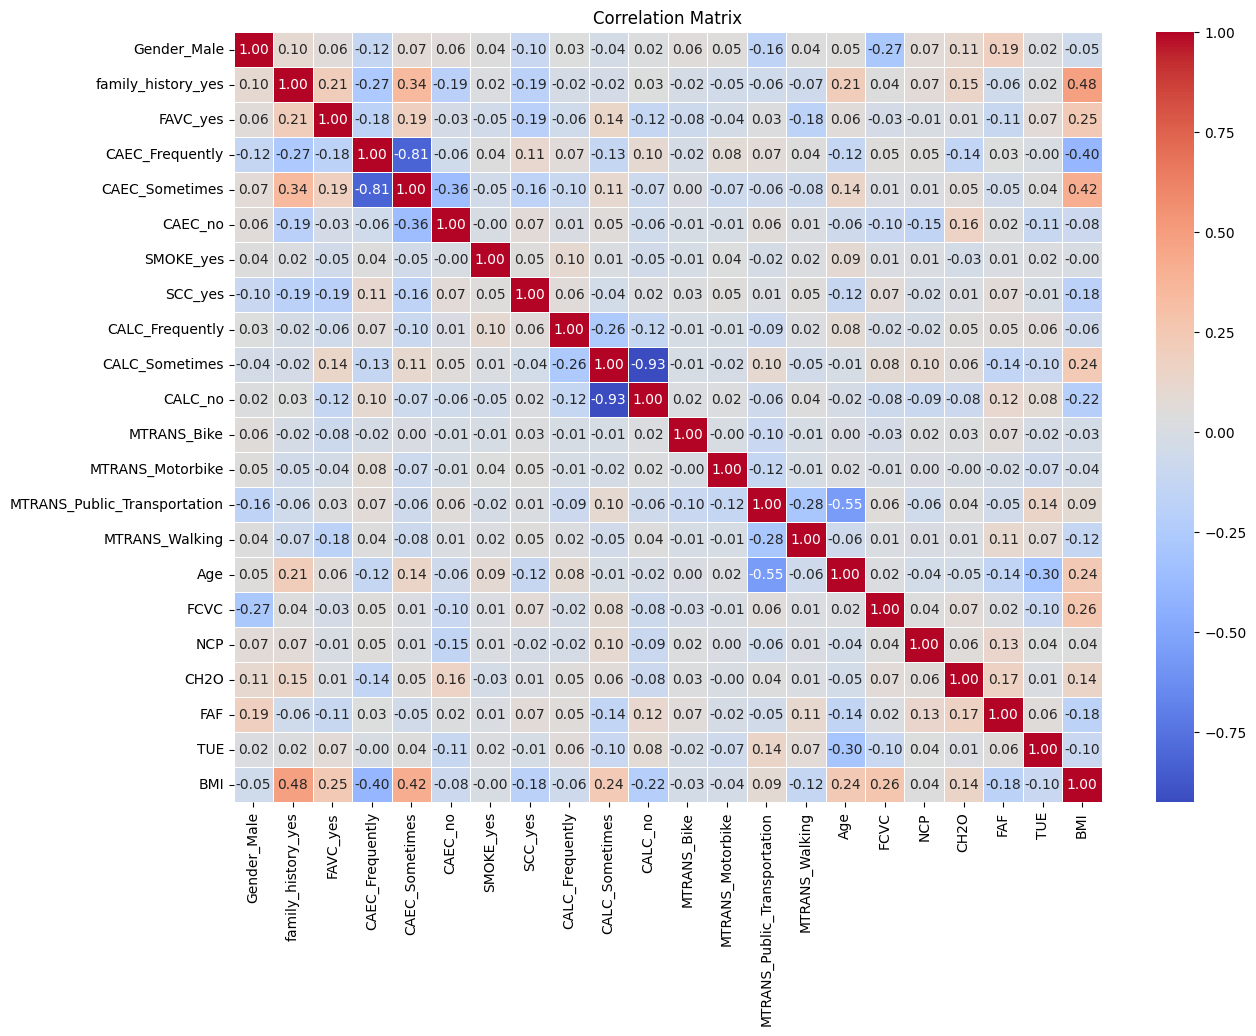

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation of numeric variables (excluding the target)  
correlation_matrix = df_encoded.drop('Obesity', axis=1).corr()

# Visualize the correlation matrix as a heatmap  
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")

# Save the figure BEFORE showing it
#plt.savefig("C:/Users/serca/Desktop/correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# Drop unwanted columns  
df_encoded = df_encoded.drop(columns=['NCP', 'CALC_Frequently', 'CALC_no', 'TUE'])
df_encoded


,Gender_Male,family_history_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Age,FCVC,CH2O,FAF,BMI,Obesity
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21.000000,2.0,2.000000,0.000000,24.386526,1
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,21.000000,3.0,3.000000,3.000000,24.238227,1
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.000000,2.0,2.000000,2.000000,23.765432,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.000000,3.0,2.000000,2.000000,26.851852,5
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.000000,2.0,2.000000,0.000000,28.342381,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,20.976842,3.0,1.728139,1.676269,44.901475,4
2107,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,21.982942,3.0,2.005130,1.341390,43.741923,4
2108,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.524036,3.0,2.054193,1.414209,43.543817,4
2109,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,24.361936,3.0,2.852339,1.139107,44.071535,4


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       216
           1       0.91      0.81      0.86       225
           2       0.94      0.90      0.92       273
           3       0.93      0.99      0.96       239
           4       0.99      1.00      0.99       261
           5       0.83      0.85      0.84       234
           6       0.86      0.85      0.86       240

    accuracy                           0.91      1688
   macro avg       0.91      0.91      0.91      1688
weighted avg       0.91      0.91      0.91      1688


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        56
           1       0.94      0.73      0.82        62
           2       0.94      0.87      0.91        78
           3       0.90      0.97      0.93        58
           4       0.98      1.00      0.99        63
         

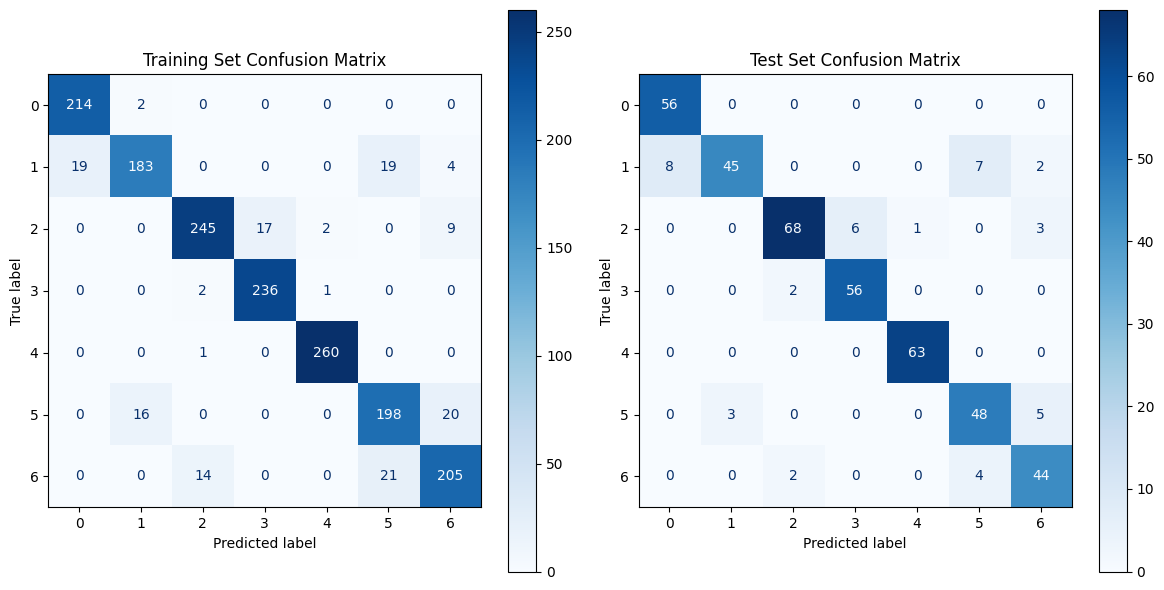

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Separate features and target variable  
X = df_encoded.drop(columns=['Obesity'])  # Hedef değişkeni çıkarıyoruz
y = df_encoded['Obesity']  # Hedef değişken

# Split the data into training and test sets (80% training, 20% test)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Logistic Regression model  
log_model = LogisticRegression(max_iter=100,class_weight='balanced', random_state=42, solver='newton-cg')

# Train the model  
log_model.fit(X_train_scaled, y_train)

# Predictions  
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# Probabilistic predictions (for Log Loss)  
y_train_proba = log_model.predict_proba(X_train_scaled)
y_test_proba = log_model.predict_proba(X_test_scaled)

# Evaluate performance  
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Log Loss
train_log_loss = log_loss(y_train, y_train_proba)
test_log_loss = log_loss(y_test, y_test_proba)

print(f"\nTraining Set Log Loss: {train_log_loss:.4f}")
print(f"Test Set Log Loss: {test_log_loss:.4f}")

# Visualize the Confusion Matrix  
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix for the training set  
ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred), display_labels=log_model.classes_).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Training Set Confusion Matrix")

# Confusion Matrix for the test set  
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=log_model.classes_).plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Test Set Confusion Matrix")

plt.tight_layout()
#plt.savefig("C:/Users/serca/Desktop/confusion_matrices_LAST.png", dpi=300, bbox_inches='tight')
plt.show()


Permutation Importance Ranking of Features:
                         Feature  Importance  Standard Deviation
17                           BMI    0.623877            0.023004
0                    Gender_Male    0.165957            0.017842
14                          FCVC    0.068558            0.008052
3                CAEC_Frequently    0.059338            0.011010
4                 CAEC_Sometimes    0.048227            0.009527
13                           Age    0.047754            0.015495
2                       FAVC_yes    0.034752            0.010033
8                 CALC_Sometimes    0.030024            0.012057
11  MTRANS_Public_Transportation    0.022695            0.008405
1             family_history_yes    0.022459            0.003385
15                          CH2O    0.018913            0.005494
5                        CAEC_no    0.012293            0.005158
16                           FAF    0.008983            0.005158
7                        SCC_yes    0.005910  

<Figure size 1000x600 with 0 Axes>

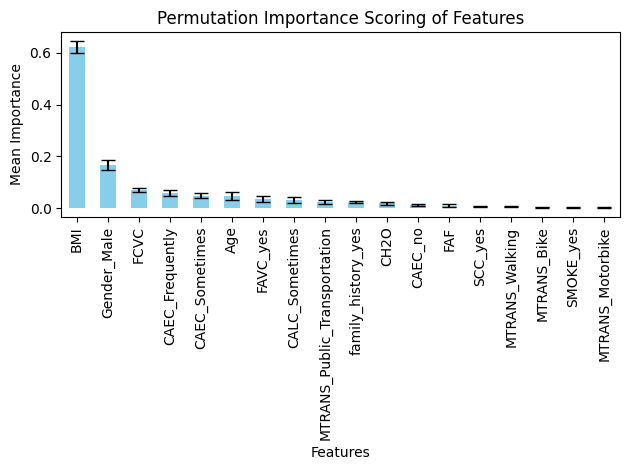

In [17]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Calculate Permutation Importance  
result = permutation_importance(log_model, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame containing feature importances  
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean,
    'Standard Deviation': result.importances_std
})

# Sort by importance  
importance_df = importance_df.sort_values(by='Importance', ascending=False)
pd.set_option('display.float_format', '{:.6f}'.format)
# Print the results  
print("Permutation Importance Ranking of Features:")
print(importance_df)

# Visualization  
plt.figure(figsize=(10, 6))
importance_df.plot(kind='bar', x='Feature', y='Importance', yerr='Standard Deviation', legend=False, color='skyblue', capsize=5)
plt.title("Permutation Importance Scoring of Features")
plt.xlabel("Features")
plt.ylabel("Mean Importance")
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig("C:/Users/serca/Desktop/PERMUTATİON-ımportance.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\serca\anaconda3\envs\obesity-test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\serca\anaconda3\envs\obesity-test\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


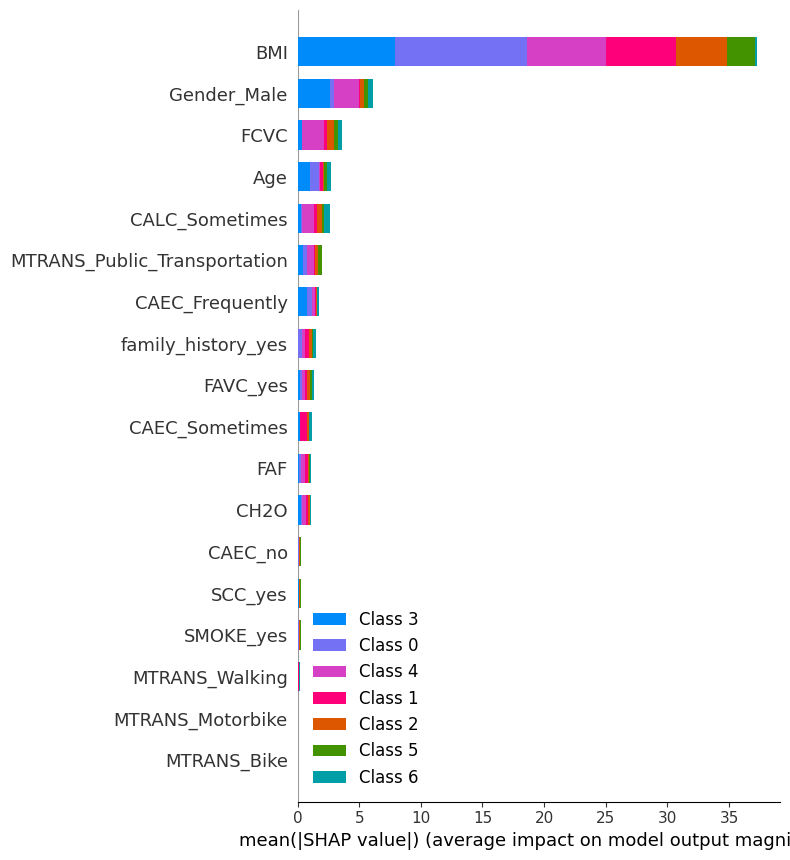

In [18]:
import shap

# Özellikleri ölçeklendirilmiş haliyle alıyoruz (model buna göre eğitildi)
X_scaled = scaler.transform(df_encoded.drop('Obesity', axis=1))

# LinearExplainer ile açıklayıcı oluşturuyoruz
explainer = shap.LinearExplainer(log_model, X_scaled, feature_perturbation="interventional")

# SHAP değerlerini hesaplıyoruz
shap_values = explainer.shap_values(X_scaled)
# Çubuk grafik olarak SHAP feature importance görselleştirmesi
shap.summary_plot(shap_values, df_encoded.drop('Obesity', axis=1), plot_type="bar")


In [19]:
from joblib import dump

# Save the model  
#dump(log_model, 'Obesity_logistic_regression_model.joblib')
#print("Model saved!")

In [20]:
# Close the connection  
conn.close()